# Fuel assembly study: 2B 1 family vs 7 families

## Import modules

In [1]:
import sys
import os
import pathlib

from OpenMC_h5_reader import *

import numpy as np
import matplotlib.pyplot as plt


In [2]:
directory = []
xs_dict = {}
plot_data = []
for filename in [name for name in os.listdir(".") if os.path.isdir(os.path.join(".", name)) ]:
    if filename != "__pycache__" and filename !=".ipynb_checkpoints":
        directory.append(filename)

FAMILY: mgxs_casl_2b_1fam

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-70.h5
ENERGY GROUP: mgxs_2b_one_eighth_CASMO-16.h5
ENERGY GROUP: mgxs_2b_one_eighth_XMAS-172.h5
ENERGY GROUP: mgxs_2b_one_eighth_SHEM-361.h5
[  2.95787414   2.02970273   1.65013494   1.3988461    1.22135052
   1.08723123   0.99533027   0.93415853   0.88656338   0.84274687
   0.80199821   0.76436266   0.72929545   0.69701613   0.66763612
   0.64180189   0.62005202   0.60140122   0.58496319   0.5724012
   0.56779193   0.5694822    0.57580239   0.58249357   0.58037337
   0.56761843   0.54824959   0.52286338   0.50038783   0.48422483
   0.47304585   0.46574219   0.46045965   0.45658284   0.45156559
   0.44690949   0.44537898   0.44626866   0.44788813   0.44971998
   0.45182632   0.4541752    0.45670705   0.45930866   0.46256378
   0.47196603   0.48334846   0.48878001   0.49260332   0.49526224
   0.49490133   0.48842431   0.46697057   0.4414523    0.42723837
   0.42113609   0.41711241   0.41422091   0.41271984   0.41108989
  

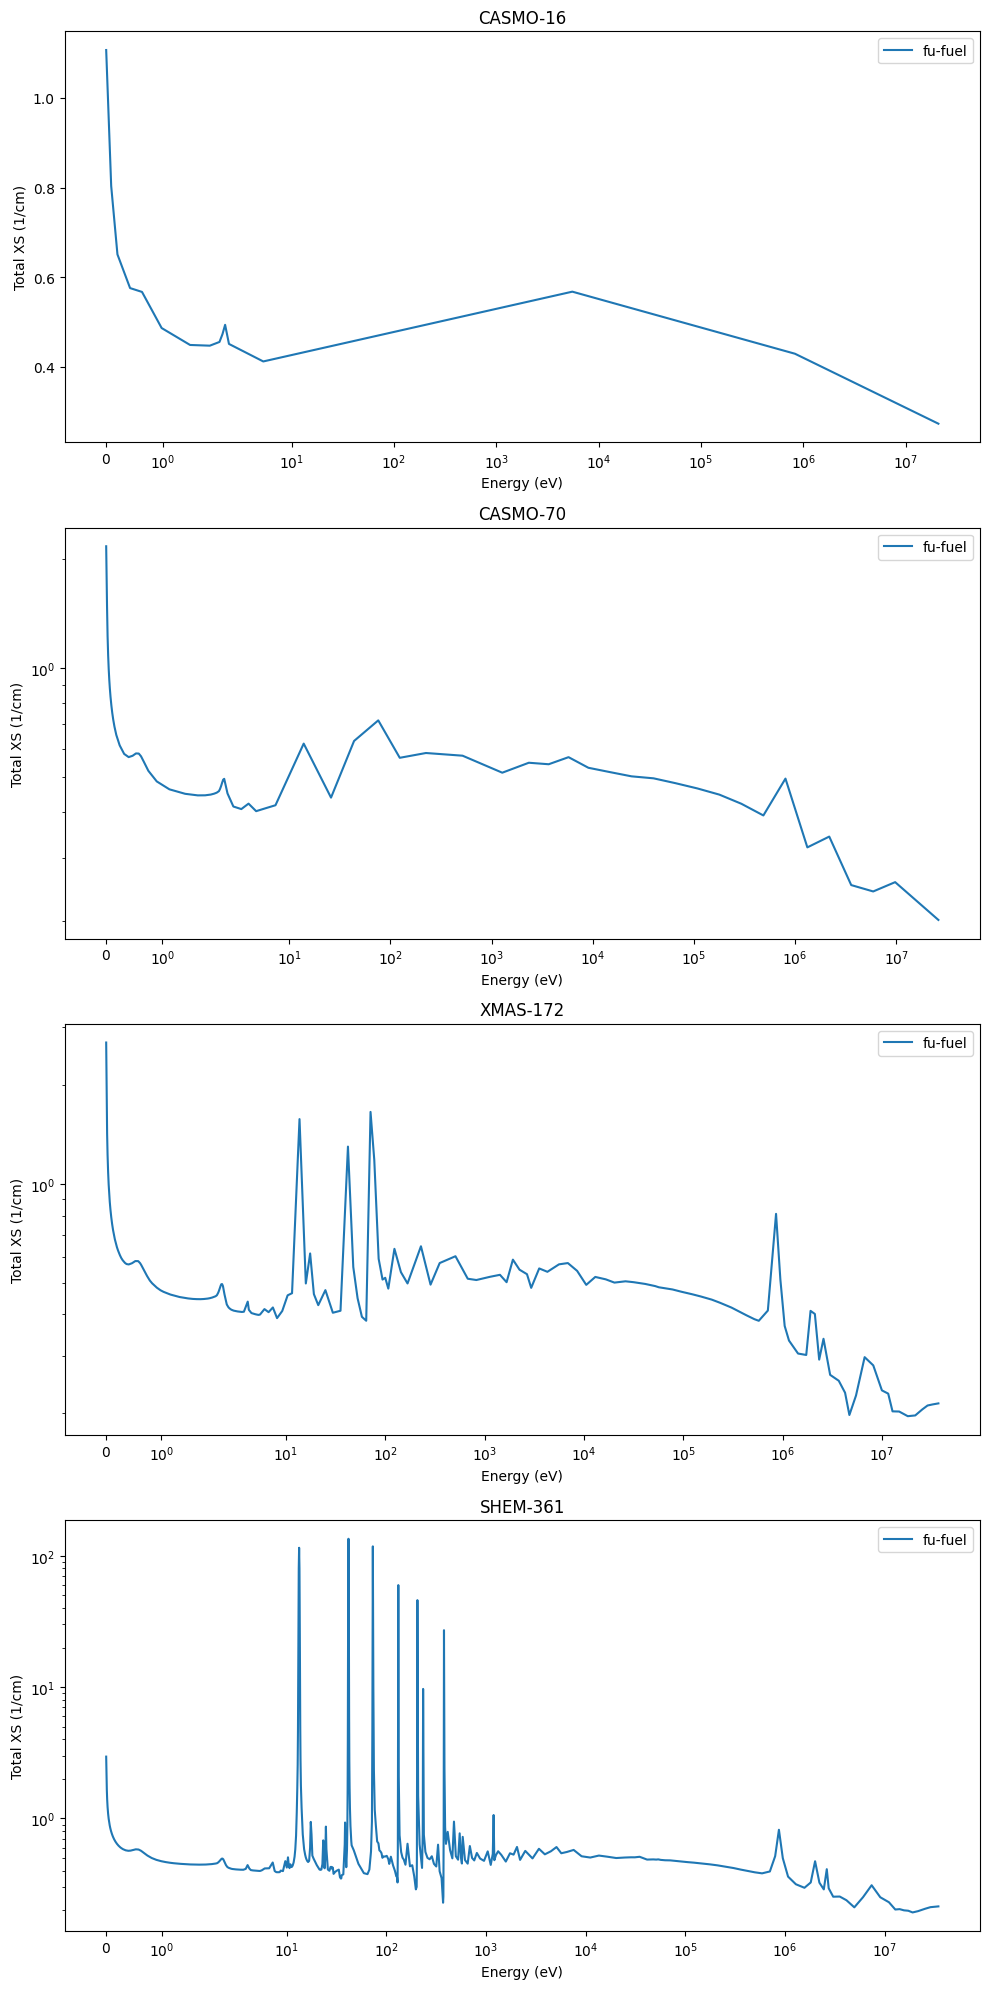

FAMILY: mgxs_casl_2b_7fam

ENERGY GROUP: mgxs_2b_one_eighth_CASMO-70.h5
ENERGY GROUP: mgxs_2b_one_eighth_CASMO-16.h5
ENERGY GROUP: mgxs_2b_one_eighth_XMAS-172.h5
ENERGY GROUP: mgxs_2b_one_eighth_SHEM-361.h5
[  2.91012235   2.02246046   1.71677754   1.39759735   1.21808034
   1.09054246   0.99488912   0.93583772   0.88910568   0.84046646
   0.80340589   0.76461337   0.72903848   0.69707526   0.66811544
   0.64272059   0.62007025   0.60157559   0.58503116   0.5724055
   0.56779004   0.56954254   0.57610544   0.58246454   0.58066118
   0.56781157   0.54888855   0.52187775   0.49995295   0.48434312
   0.47269162   0.4659656    0.46040362   0.45668646   0.45122357
   0.44698917   0.44537719   0.44620205   0.44783794   0.44970834
   0.4518894    0.45415985   0.45681187   0.45943121   0.46232429
   0.4718297    0.48328094   0.48936661   0.49258456   0.49511726
   0.49473811   0.48841453   0.46665109   0.44199291   0.42676427
   0.42099979   0.41665102   0.41409032   0.41259289   0.41097835
  

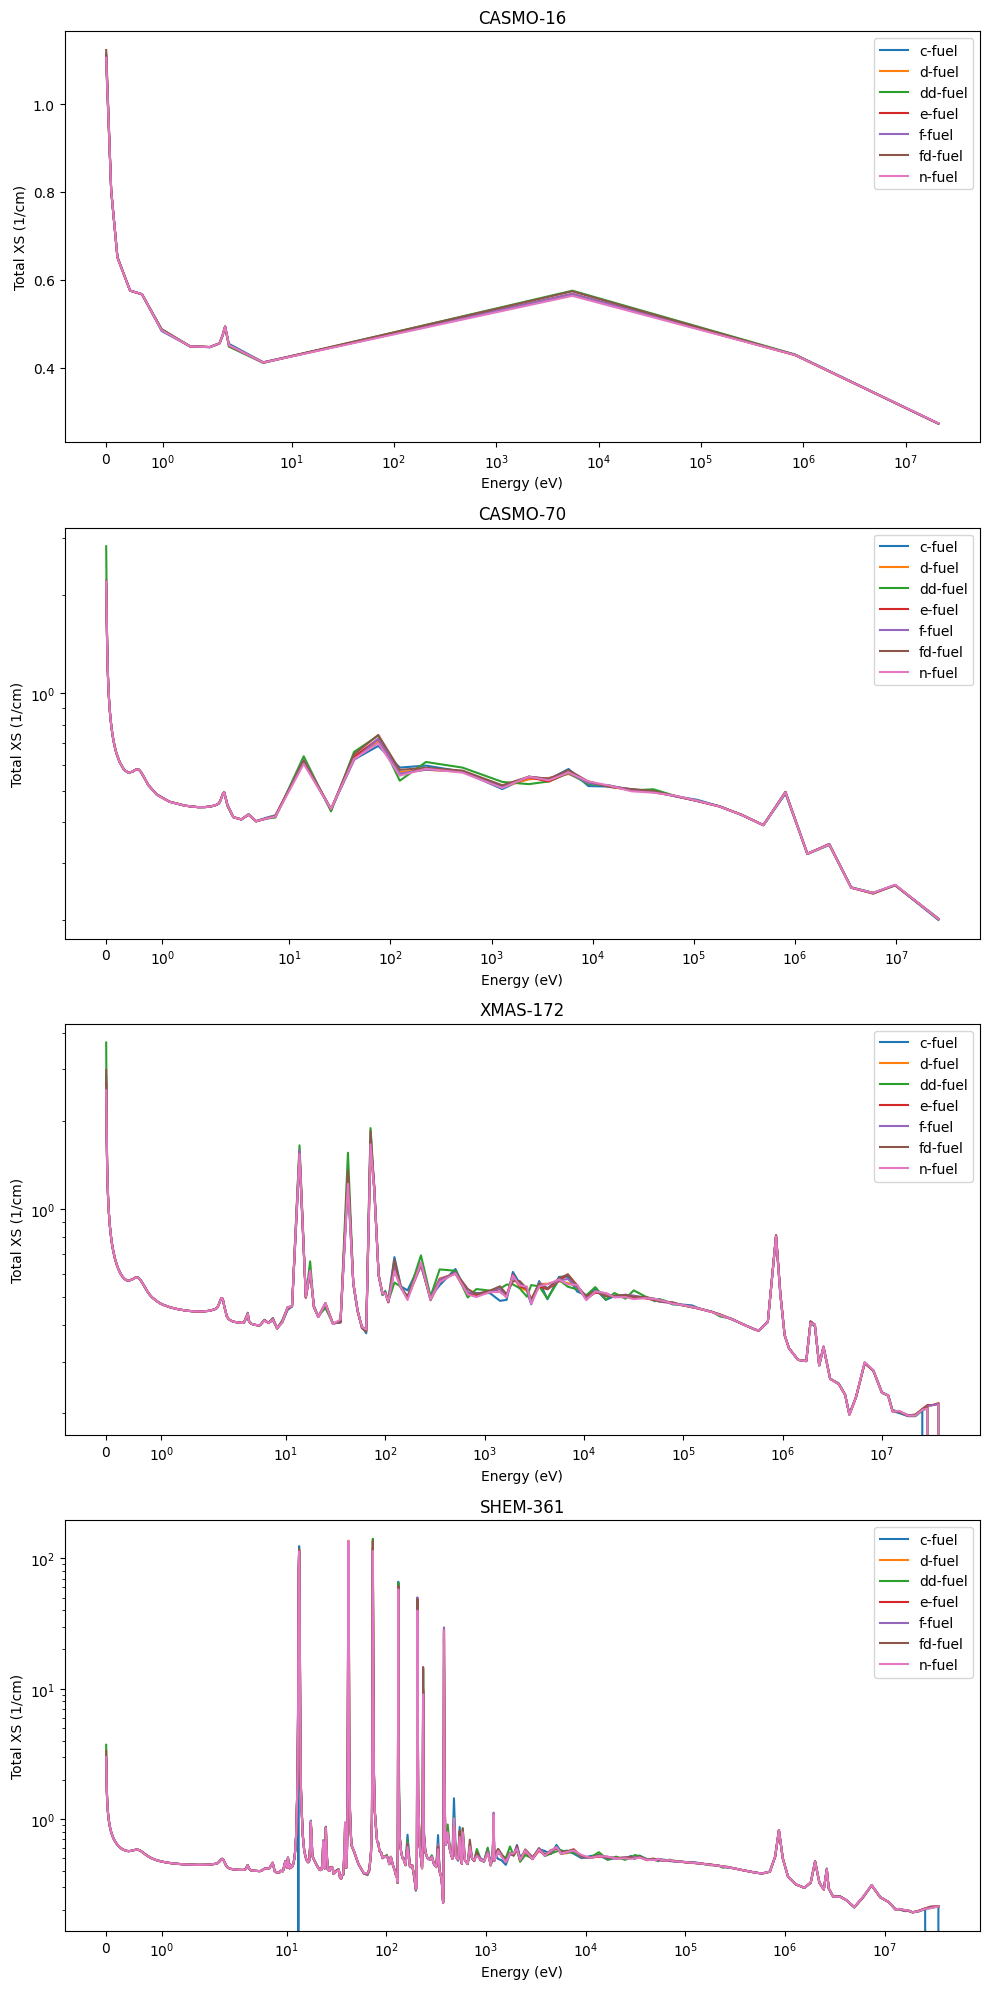

In [7]:

for folder in directory:
    xs_dict[folder]={}
    print("FAMILY:",folder+"\n")
    fig, (cas16,cas70,xmas,shem) = plt.subplots(4,1,figsize=(10,20),layout ='tight')
    for filename in os.listdir(folder):
        if ".h5" in filename:
            print("ENERGY GROUP:",filename)
            filepath = folder+"/"+filename
            xs_dict[folder][filename]=hdf5_to_dict(filepath, with_attributes=True)
            energy_groups = xs_dict[folder][filename]['attributes']['group structure']
            energy_mids = np.zeros(energy_groups.shape[0]-1)
            for i in range(1,energy_mids.shape[0]):
                energy_mids[i] = (energy_groups[i+1] + energy_groups[i])
            for key in xs_dict[folder][filename].keys():
                if ("fuel" in key) and ("clad" not in key) and ("gap" not in key):
                    if "CASMO-70" in filename:
                        cas70.loglog(energy_mids,xs_dict[folder][filename][key]["294K"]["total"][::-1],label = key)
                        
                    elif "CASMO-16" in filename:
                        cas16.plot(energy_mids,xs_dict[folder][filename][key]["294K"]["total"][::-1],label = key)

                    elif "XMAS" in filename:
                        xmas.loglog(energy_mids,xs_dict[folder][filename][key]["294K"]["total"][::-1],label = key)
                        
                    elif "SHEM" in filename:
                        shem.loglog(energy_mids,xs_dict[folder][filename][key]["294K"]["total"][::-1],label = key)
    cas70.set_title('CASMO-70');cas70.set_ylabel("Total XS (1/cm)");cas70.set_xlabel("Energy (eV)");cas70.set_xscale('symlog');cas70.legend()
    cas16.set_title('CASMO-16');cas16.set_ylabel("Total XS (1/cm)");cas16.set_xlabel("Energy (eV)");cas16.set_xscale('symlog');cas16.legend()
    xmas.set_title('XMAS-172');xmas.set_ylabel("Total XS (1/cm)");xmas.set_xlabel("Energy (eV)");xmas.set_xscale('symlog');xmas.legend()
    shem.set_title('SHEM-361');shem.set_ylabel("Total XS (1/cm)");shem.set_xlabel("Energy (eV)");shem.set_xscale('symlog');shem.legend()     
    plt.show()


                    


In [4]:
for key in xs_dict.keys():
    print("Folder:",key,"\nFiles:",xs_dict[key].keys())

Folder: mgxs_casl_2b_1fam 
Files: dict_keys(['mgxs_2b_one_eighth_CASMO-70.h5', 'mgxs_2b_one_eighth_CASMO-16.h5', 'mgxs_2b_one_eighth_XMAS-172.h5', 'mgxs_2b_one_eighth_SHEM-361.h5'])
Folder: mgxs_casl_2b_7fam 
Files: dict_keys(['mgxs_2b_one_eighth_CASMO-70.h5', 'mgxs_2b_one_eighth_CASMO-16.h5', 'mgxs_2b_one_eighth_XMAS-172.h5', 'mgxs_2b_one_eighth_SHEM-361.h5'])
